# Your own network

### This project uses a self-selected data set to work out neural network builds with SKLearn

In [200]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

sns.set_style('darkgrid')
%matplotlib inline

In [8]:
with open('../../../_Large_datasets/cifar-10-batches-py/data_batch_2', 'rb') as file:
    my_dict = pickle.load(file, encoding='bytes')

In [107]:
print(my_dict.keys())

X = pd.DataFrame(my_dict[b'data'])
y = pd.Series(my_dict[b'labels'])

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [108]:
y.value_counts()

7    1026
4    1010
2    1010
6    1008
1    1007
3     995
5     988
8     987
9     985
0     984
dtype: int64

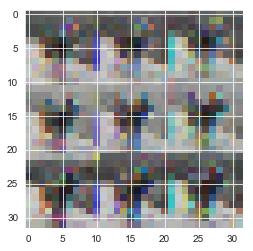

In [179]:
doggie = X.loc[800].values
plt.imshow(doggie.reshape(32, 32, 3))

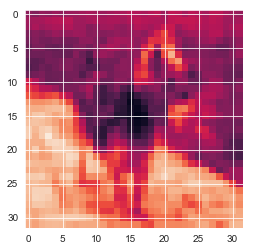

In [180]:
plt.imshow(doggie[:1024].reshape(32, 32))

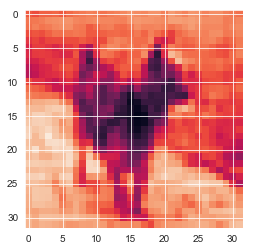

In [181]:
plt.imshow(doggie[1024:2048].reshape(32, 32))

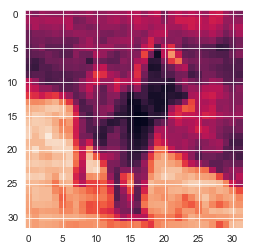

In [182]:
plt.imshow(doggie[2048:].reshape(32, 32))

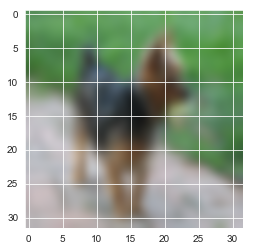

In [186]:
plt.imshow(doggie.reshape(3, 32, 32).transpose(1, 2, 0), interpolation='bicubic')

In [184]:
doggie.reshape(3, 32, 32)[0]

array([[ 87,  82,  90, ...,  99,  96,  92],
       [ 96,  98,  99, ...,  96,  96,  99],
       [ 93, 101,  94, ...,  95, 101, 104],
       ...,
       [183, 181, 187, ..., 186, 190, 181],
       [188, 181, 191, ..., 174, 182, 183],
       [186, 179, 187, ..., 166, 189, 190]], dtype=uint8)

In [197]:
doggie.reshape(3, 32, 32).transpose(1, 2, 0)[0]

array([[ 87, 143,  91],
       [ 82, 138,  84],
       [ 90, 146,  96],
       [ 89, 146,  92],
       [ 93, 148,  91],
       [ 90, 143,  91],
       [ 93, 149,  96],
       [ 94, 154,  89],
       [ 97, 156,  93],
       [100, 159,  98],
       [ 97, 157,  90],
       [ 94, 153,  91],
       [ 97, 157,  97],
       [100, 159,  98],
       [101, 162,  97],
       [107, 167, 106],
       [104, 163, 108],
       [101, 161,  94],
       [107, 166, 107],
       [109, 166, 113],
       [ 96, 159,  80],
       [111, 170, 103],
       [109, 165, 111],
       [100, 160, 103],
       [108, 168, 110],
       [105, 166, 104],
       [100, 160,  95],
       [109, 165, 116],
       [109, 165, 119],
       [ 99, 158,  97],
       [ 96, 156,  88],
       [ 92, 152,  81]], dtype=uint8)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [217]:
rbm = BernoulliRBM(learning_rate=0.05, n_iter=15, n_components=100)
clf_log = LogisticRegression(solver='lbfgs', multi_class='multinomial')
clf_rbm = Pipeline(steps=[('rbm', rbm), ('log', clf_log)])

clf_rbm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=100, n_iter=15,
       random_state=None, verbose=0)), ('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [218]:
clf_rbm.score(X_test, y_test)

0.0905